In [ ]:
import numpy as np
np.set_printoptions(threshold=10000, suppress = True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Exercice 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import  f1_score

# Load the data
file_path = 'mouse.txt'
mouse_data = pd.read_csv(file_path, sep="\s+", header=None, names=['x1', 'x2'])

# Display basic info and first few rows of the data
mouse_data_info = mouse_data.info()
mouse_data_head = mouse_data.head()

mouse_data_info, mouse_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(None,
          x1        x2
 0  0.456601  0.432806
 1  0.611378  0.528625
 2  0.450299  0.711606
 3  0.639015  0.460744
 4  0.628957  0.323470)

In [ ]:
mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
mouse_data.describe()

,x1,x2
count,500.000000,500.000000
mean,0.505892,0.599706
std,0.191763,0.156863
min,0.040555,0.138940
25%,0.328481,0.469010
50%,0.504702,0.629494
75%,0.681430,0.735364
max,0.916030,0.897028


In [ ]:
mouse_data.isnull().sum()

x1    0
x2    0
dtype: int64

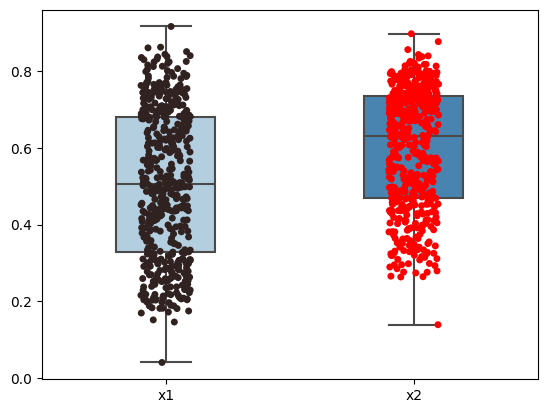

In [ ]:
import seaborn as sns
sns.boxplot(data=mouse_data, width=0.4, palette="Blues")  # Adjust width and palette as desired
sns.stripplot(data=mouse_data, palette='dark:red', jitter=True, size=5,orient="v")
plt.show()

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

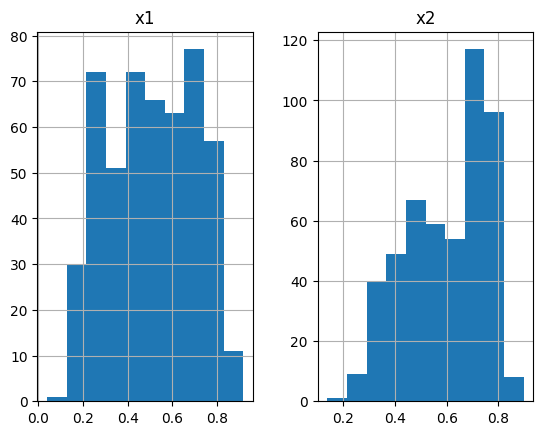

In [ ]:
mouse_data.hist()

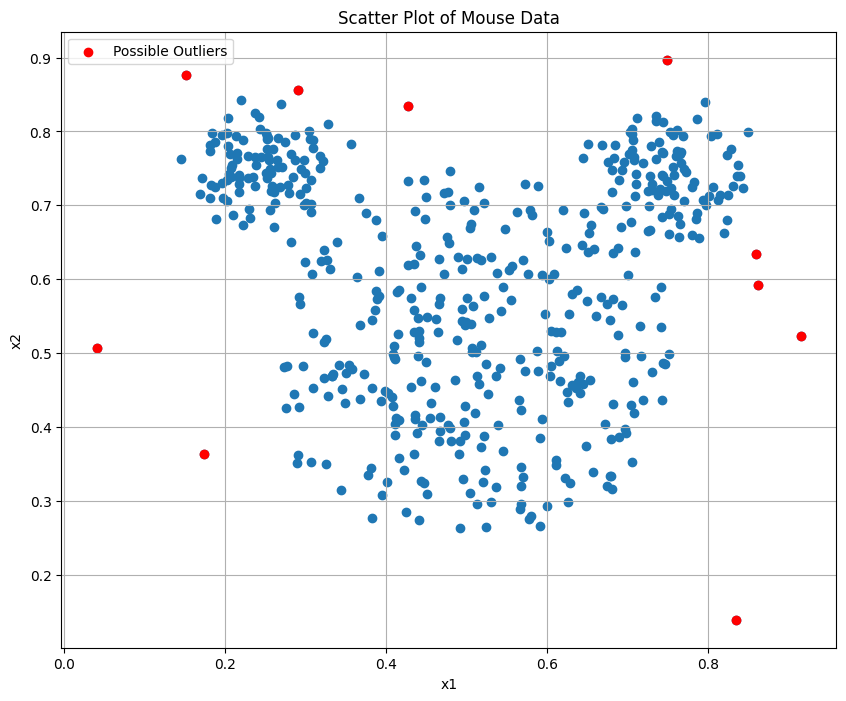

In [ ]:

# Plotting the data points
plt.figure(figsize=(10, 8))
plt.scatter(mouse_data['x1'], mouse_data['x2'])
plt.title('Scatter Plot of Mouse Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

# Highlight the last 10 points which are supposed to be outliers
plt.scatter(mouse_data['x1'].tail(10), mouse_data['x2'].tail(10), color='red', label='Possible Outliers')
plt.legend()

plt.show()


Technique Isolation Forest pour détecter les outliers.


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# Apply Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(mouse_data)
predictions =iso_forest.predict(mouse_data)
predictions

array([ 1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1

Text(0, 0.5, 'x2')

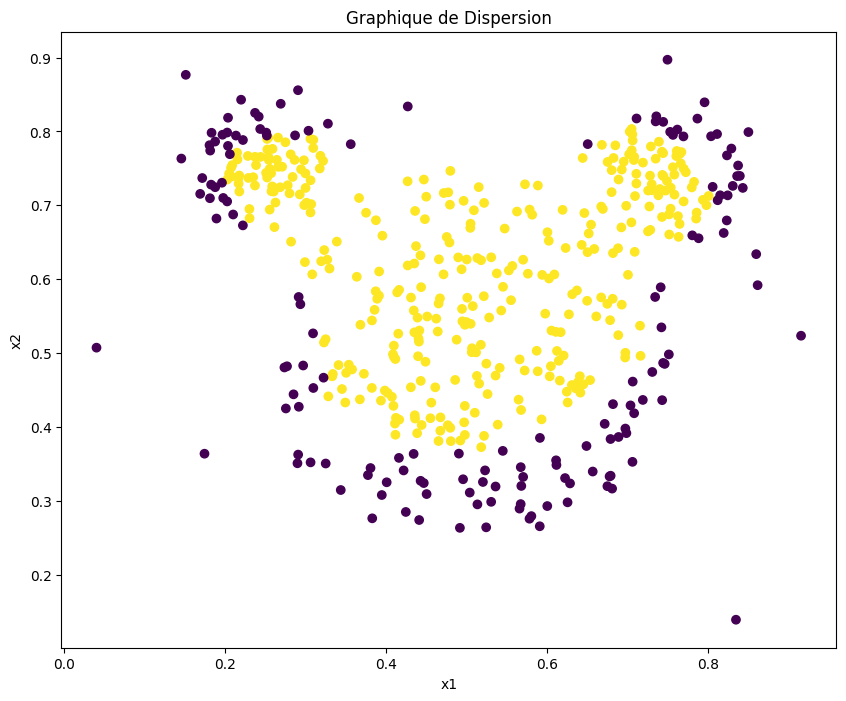

In [ ]:
plt.figure(figsize=(10, 8))  # Largeur de 12 unités, hauteur de 6 unités
plt.scatter(mouse_data.x1,mouse_data.x2,c=iso_forest.predict(mouse_data))
plt.title('Graphique de Dispersion')
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
f1 = f1_score(labels, predictions, pos_label=-1)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.12


Technique Local Outlier Factor pour détecter les outliers.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers = lof.fit_predict(mouse_data)
print("Outlier Labels:", outliers)

Outlier Labels: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  

Text(0, 0.5, 'x2')

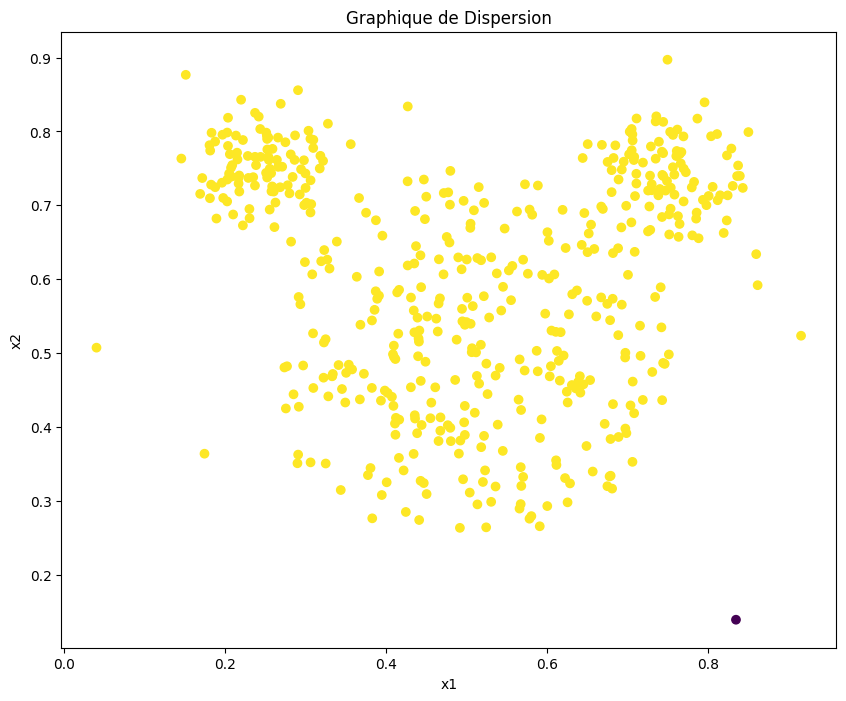

In [ ]:
plt.figure(figsize=(10, 8))  # Largeur de 12 unités, hauteur de 6 unités
plt.scatter(mouse_data.x1,mouse_data.x2,c=lof.fit_predict(mouse_data))
plt.title('Graphique de Dispersion')
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
labels = np.array([1] * (500 - 10) + [-1] * 10)
f1 = f1_score(labels, outliers, pos_label=-1)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.18


##Pour chacune des approches, proposer une approche pour mieux choisir le seuil de contamination.

Approche pour IF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


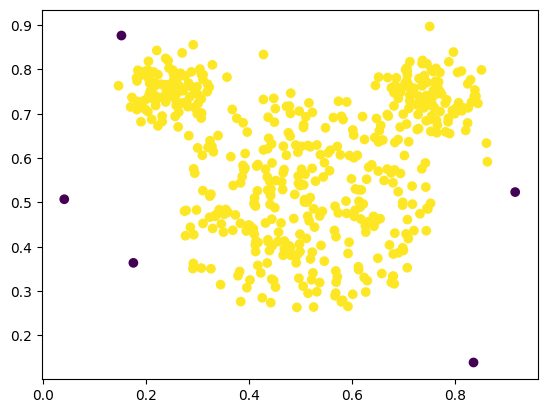

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


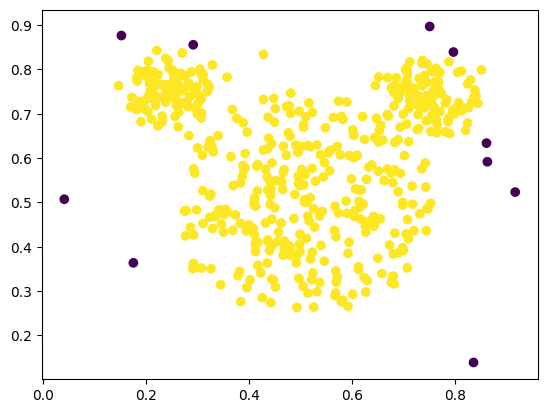

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


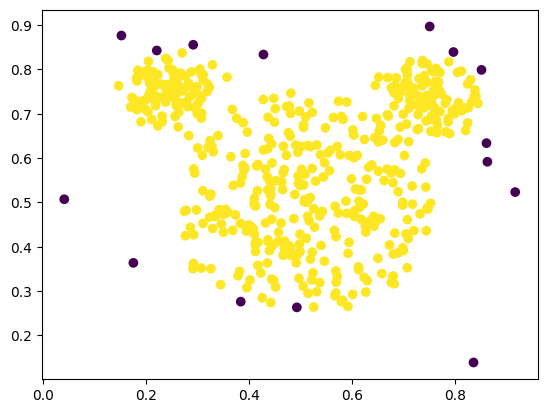

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


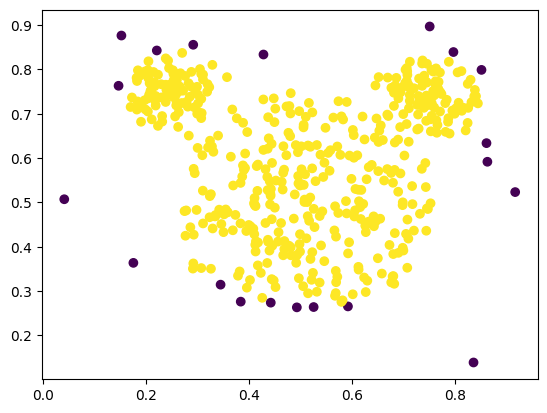

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


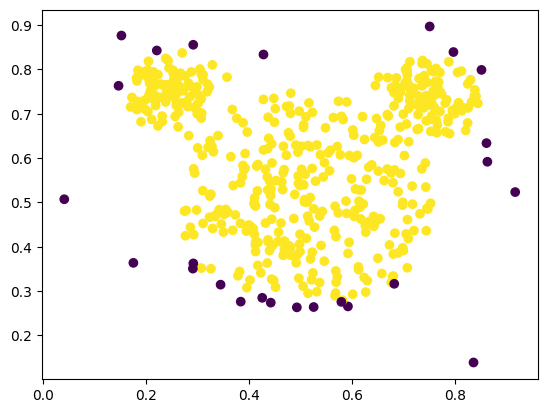

In [ ]:
from sklearn.model_selection import cross_val_score
contamination_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
for contamination in contamination_rates:
    model = IsolationForest(contamination=contamination, random_state=42)
    plt.scatter(mouse_data.x1,mouse_data.x2,c=model.fit_predict(mouse_data[['x1','x2']]))
    plt.show()

**Visuellement pour un seuil de contamination = 2% on voit que le modéle Isolation Forest detecte le maximum des anomalies en comparaisons au autre seuils***

Approche pour LOF


0.01


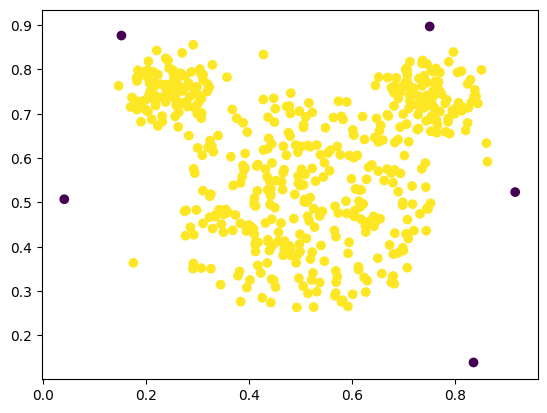

0.02


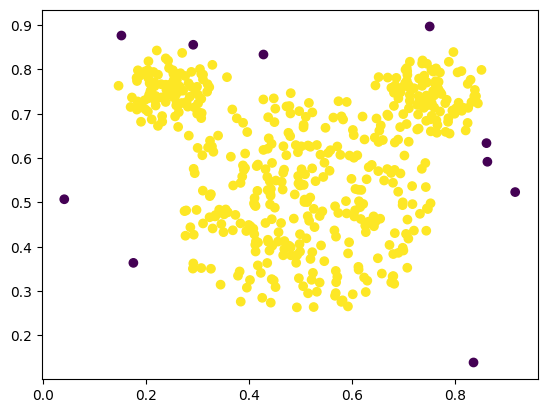

0.03


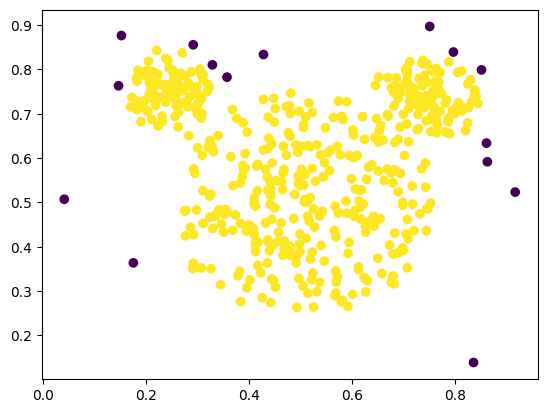

0.04


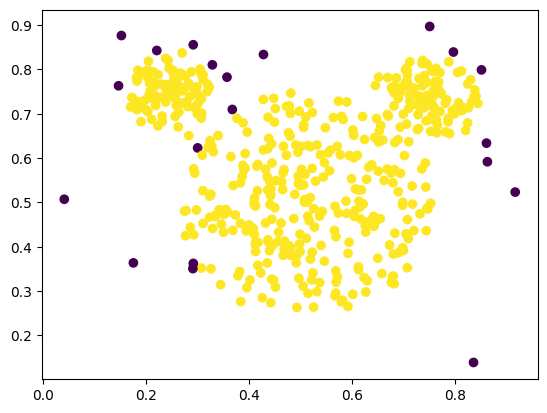

0.05


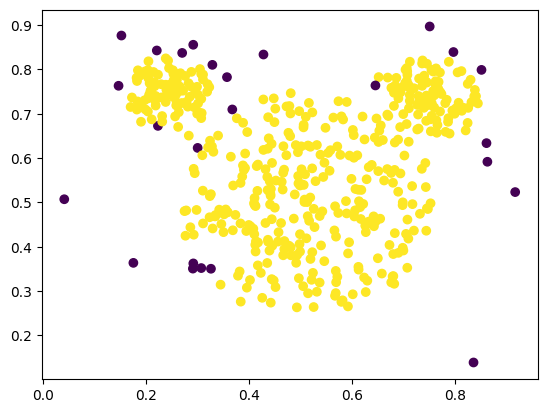

In [ ]:
contamination_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
for contamination in contamination_rates:
  print(contamination)
  LOF = LocalOutlierFactor(contamination=contamination)
  plt.scatter(mouse_data.x1,mouse_data.x2,c=LOF.fit_predict(mouse_data[['x1','x2']]))
  plt.show()

****Visuellement pour un seuil de contamination = 2% on voit que le modéle LOF detecte tous les anomalies****

##Visualisation des données aberrantes par les deux approches

Visualisation avec IsolationForest avec un seuil de contamination = 2%

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


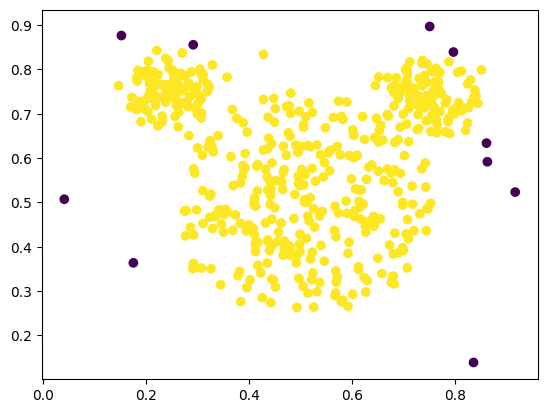

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

iso_forest = IsolationForest(contamination=0.02,random_state=42)
iso_forest.fit(mouse_data)
plt.scatter(mouse_data.x1,mouse_data.x2,c=iso_forest.fit_predict(mouse_data[['x1','x2']]))
plt.show()

Visualisation avec LocalOutlierFactor avec un seuil de contamination = 2%

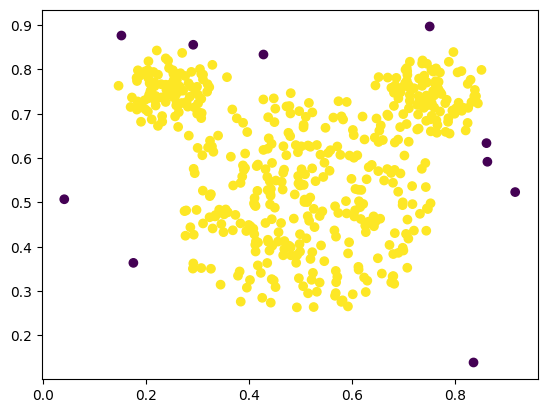

In [ ]:
LOF = LocalOutlierFactor(contamination=0.02)
LOF.fit(mouse_data)
plt.scatter(mouse_data.x1,mouse_data.x2,c=LOF.fit_predict(mouse_data[['x1','x2']]))
plt.show()

##Comparaison

**Comparaison numérique**

In [ ]:
labels = np.array([1] * (500 - 10) + [-1] * 10)
outliers_IF = iso_forest.fit_predict(mouse_data[['x1','x2']])
f1 = f1_score(labels, outliers_IF, pos_label=-1)
print('Réultats numérique Isolation Forest')

print(f"F1 Score: {f1:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Réultats numérique Isolation Forest
F1 Score: 0.90


In [ ]:
labels = np.array([1] * (500 - 10) + [-1] * 10)
outliers_LOF = LOF.fit_predict(mouse_data[['x1','x2']])
f1 = f1_score(labels, outliers_LOF, pos_label=-1)
print('Réultats numérique LocalOutlierFactor')

print(f"F1 Score: {f1:.2f}")


Réultats numérique LocalOutlierFactor
F1 Score: 1.00


**Numériquement, On remarque que le modéle LocalOutlier Factor donne les meilleure résultats**

**Visuellement on voit que le modéle LocalOutlierFactor détécte toutes les anomalies, en comparaison à IsolationForest qui detecte un nombre important mais pas tous**

***Le modéle Local Outlier Factor est plus performant que le modéle Isolation Forest, vu les résultats numériques et graphiques obtenus***